<a href="https://colab.research.google.com/github/datamilas/CroLyricsProject/blob/master/Python/google_colab/visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
from os import path
import numpy as np
import matplotlib.pyplot as plt
import sqlite3


In [179]:
def get_artist_code(artist_name):
    conn = sqlite3.connect('/content/gdrive/My Drive/CroLyrics_data/info.db')
    c = conn.cursor()
    c.execute("SELECT code FROM artists WHERE name=:name", {'name': artist_name})
    return c.fetchone()


def get_artist_name(artist_code):
    conn = sqlite3.connect('/content/gdrive/My Drive/CroLyrics_data/info.db')
    c = conn.cursor()
    c.execute("SELECT name FROM artists WHERE code=:code", {'code': artist_code})
    return c.fetchone()

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [184]:
nlp_file_path = f"/content/gdrive/My Drive/CroLyrics_data/nlp_all.csv"

In [185]:
df = pd.read_csv(nlp_file_path)

In [207]:
df_unique_lemmas = df.drop_duplicates(subset=["lemma", "Song_ID"]).reset_index(drop=False)

locations = df_unique_lemmas[(df_unique_lemmas["ner"].isin(["B-LOC", "I-LOC"])) & (df_unique_lemmas["upos"]=="PROPN")]["lemma"]#.value_counts()
names = df_unique_lemmas[(df_unique_lemmas["ner"].isin(["B-PER", "I-PER"])) & (df_unique_lemmas["upos"]=="PROPN")]["lemma"]#.value_counts()
organizations = df_unique_lemmas[(df_unique_lemmas["ner"].isin(["B-ORG", "I-ORG"])) & (df_unique_lemmas["upos"]=="PROPN")]["lemma"]#.value_counts()
nouns = df_unique_lemmas[(df_unique_lemmas.upos=="NOUN")]["lemma"]#.value_counts()
verbs = df_unique_lemmas[(df_unique_lemmas.upos=="VERB")]["lemma"]#.value_counts()
adjectives = df_unique_lemmas[(df_unique_lemmas.upos=="ADJ")]["lemma"]#.value_counts()
adverbs = df_unique_lemmas[(df_unique_lemmas.upos=="ADV")]["lemma"]#.value_counts()

In [208]:
locations.value_counts()[0:10]

Hrvatska     39
Zagreb       29
Sava         29
Jadran       23
Dunav        23
Slavonija    21
Split        19
Dalmacija    19
Bosna        18
Sarajevo     17
Name: lemma, dtype: int64

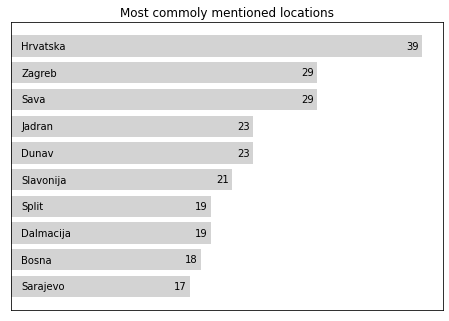

In [210]:

variable = 'locations'
x = list(locations.value_counts()[0:10].index)
y = list(locations.value_counts()[0:10].values)
x.reverse()
y.reverse()
fig = plt.figure()    
ax = ax = fig.add_axes([0, 0, 1, 1])

width = 0.8 # the width of the bars 
ax.barh(x, y, width, color = "lightgrey")
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

plt.title(f"Most commoly mentioned {variable}")
for i, v in enumerate(y):
    ax.text(v-1.5 , i -0.1, str(v), color='black')

for bar, v in zip(ax.patches, x):
    ax.text(1, bar.get_y()+bar.get_height()/2, v, color = 'black', ha = 'left', va = 'center') 

In [259]:
from wordcloud import WordCloud
import plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

%matplotlib inline

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

In [280]:
# Creating two subplots
fig = make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                    shared_yaxes=False, vertical_spacing=0.001)

In [298]:
locations = df_unique_lemmas[(df_unique_lemmas["ner"].isin(["B-LOC", "I-LOC"])) & (df_unique_lemmas["upos"]=="PROPN")]


In [299]:
locations

,index,id,text,lemma,upos,xpos,feats,head,deprel,misc,...,Number[psor],Poss,Definite,Polarity,Reflex,Voice,Foreign,NumType,Animacy,Gender[psor]
381,826,7,Palace,Palace,PROPN,Npmsan,Animacy=Inan|Case=Acc|Gender=Masc|Number=Sing,3,nmod,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Inan,NaN
383,828,9,Marjan,Marjan,PROPN,Npmsn,Case=Nom|Gender=Masc|Number=Sing,7,conj,SpaceAfter=No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
390,839,20,Split,Split,PROPN,Npmsan,Animacy=Inan|Case=Acc|Gender=Masc|Number=Sing,21,obl,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Inan,NaN
883,1919,23,Dalmaciju,Dalmacija,PROPN,Npfsa,Case=Acc|Gender=Fem|Number=Sing,24,obj,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048,2231,2,Dalmacijom,Dalmacija,PROPN,Npfsi,Case=Ins|Gender=Fem|Number=Sing,0,root,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294076,669274,8,Nasica,Našice,PROPN,Npmsg,Case=Gen|Gender=Fem|Number=Sing,6,nmod,SpaceAfter=No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
294281,669727,8,Anuska,Anuska,PROPN,Npfsn,Case=Nom|Gender=Fem|Number=Sing,6,nsubj,SpaceAfter=No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
294468,670229,8,Sokca,Sokac,PROPN,Npmsl,Case=Loc|Gender=Masc|Number=Sing,10,orphan,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
294602,670503,1,Vukovar,Vukovar,PROPN,Npmsn,Case=Nom|Gender=Masc|Number=Sing,0,root,SpaceAfter=No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [296]:
locations.value_counts()
fig = px.bar(locations,
            x=locations.value_counts().values,
            y=locations.value_counts().index,
            orientation='h')

fig.show(renderer="colab")

In [300]:
import plotly.graph_objects as go

top_labels = ['Strongly<br>agree', 'Agree', 'Neutral', 'Disagree',
              'Strongly<br>disagree']

colors = ['rgba(38, 24, 74, 0.8)', 'rgba(71, 58, 131, 0.8)',
          'rgba(122, 120, 168, 0.8)', 'rgba(164, 163, 204, 0.85)',
          'rgba(190, 192, 213, 1)']

x_data = [[21, 30, 21, 16, 12],
          [24, 31, 19, 15, 11],
          [27, 26, 23, 11, 13],
          [29, 24, 15, 18, 14]]

y_data = ['The course was effectively<br>organized',
          'The course developed my<br>abilities and skills ' +
          'for<br>the subject', 'The course developed ' +
          'my<br>ability to think critically about<br>the subject',
          'I would recommend this<br>course to a friend']

fig = go.Figure()

for i in range(0, len(x_data[0])):
    for xd, yd in zip(x_data, y_data):
        fig.add_trace(go.Bar(
            x=[xd[i]], y=[yd],
            orientation='h',
            marker=dict(
                color=colors[i],
                line=dict(color='rgb(248, 248, 249)', width=1)
            )
        ))

fig.update_layout(
    xaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
        domain=[0.15, 1]
    ),
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
    ),
    barmode='stack',
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
    margin=dict(l=120, r=10, t=140, b=80),
    showlegend=False,
)

annotations = []

for yd, xd in zip(y_data, x_data):
    # labeling the y-axis
    annotations.append(dict(xref='paper', yref='y',
                            x=0.14, y=yd,
                            xanchor='right',
                            text=str(yd),
                            font=dict(family='Arial', size=14,
                                      color='rgb(67, 67, 67)'),
                            showarrow=False, align='right'))
    # labeling the first percentage of each bar (x_axis)
    annotations.append(dict(xref='x', yref='y',
                            x=xd[0] / 2, y=yd,
                            text=str(xd[0]) + '%',
                            font=dict(family='Arial', size=14,
                                      color='rgb(248, 248, 255)'),
                            showarrow=False))
    # labeling the first Likert scale (on the top)
    if yd == y_data[-1]:
        annotations.append(dict(xref='x', yref='paper',
                                x=xd[0] / 2, y=1.1,
                                text=top_labels[0],
                                font=dict(family='Arial', size=14,
                                          color='rgb(67, 67, 67)'),
                                showarrow=False))
    space = xd[0]
    for i in range(1, len(xd)):
            # labeling the rest of percentages for each bar (x_axis)
            annotations.append(dict(xref='x', yref='y',
                                    x=space + (xd[i]/2), y=yd,
                                    text=str(xd[i]) + '%',
                                    font=dict(family='Arial', size=14,
                                              color='rgb(248, 248, 255)'),
                                    showarrow=False))
            # labeling the Likert scale
            if yd == y_data[-1]:
                annotations.append(dict(xref='x', yref='paper',
                                        x=space + (xd[i]/2), y=1.1,
                                        text=top_labels[i],
                                        font=dict(family='Arial', size=14,
                                                  color='rgb(67, 67, 67)'),
                                        showarrow=False))
            space += xd[i]

fig.update_layout(annotations=annotations)

fig.show(renderer="colab")

In [303]:
!pip install dash

     |████████████████████████████████| 8.5 MB 5.6 MB/s 
     |████████████████████████████████| 357 kB 58.5 MB/s 


In [1]:
# How to run a Dash app in Google Colab (https://stackoverflow.com/questions/53622518/launch-a-dash-app-in-a-google-colab-notebooky)
## Requirements

### Install ngrok
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

### Run ngrok to tunnel Dash app port 8050 to the outside world. 
### This command runs in the background.
get_ipython().system_raw('./ngrok http 8050 &')

### Get the public URL where you can access the Dash app. Copy this URL.
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

### Install Dash
!pip install dash==0.31.1  # The core dash backend
!pip install dash-html-components==0.13.2  # HTML components
!pip install dash-core-components==0.39.0  # Supercharged components
!pip install dash-table==3.1.7  # Interactive DataTable component (new!)

--2022-03-11 19:22:45--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.237.133.81, 52.202.168.65, 18.205.222.128, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.237.133.81|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.1’

ngrok-stable-linux- 100%[===================>]  13.19M  3.38MB/s    in 4.9s    

2022-03-11 19:22:50 (2.69 MB/s) - ‘ngrok-stable-linux-amd64.zip.1’ saved [13832437/13832437]

Archive:  ngrok-stable-linux-amd64.zip
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ngrok                   
https://016a-35-233-212-138.ngrok.io


In [2]:
## Dash app (https://dash.plot.ly/getting-started)

### Save file with Dash app on the Google Colab machine
%%writefile my_app1.py
import dash
import dash_core_components as dcc
import dash_html_components as html

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

app.layout = html.Div(children=[
    html.H1(children='Hello Dash'),

    html.Div(children='''
        Dash: A web application framework for Python.
    '''),

    dcc.Graph(
        id='example-graph',
        figure={
            'data': [
                {'x': [1, 2, 3], 'y': [4, 1, 2], 'type': 'bar', 'name': 'SF'},
                {'x': [1, 2, 3], 'y': [2, 4, 5], 'type': 'bar', 'name': u'Montréal'},
            ],
            'layout': {
                'title': 'Dash Data Visualization'
            }
        }
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)

Overwriting my_app1.py


In [3]:
### Run Dash app
!python my_app1.py

Running on http://127.0.0.1:8050/
Debugger PIN: 722-452-480
 * Serving Flask app "my_app1" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
Running on http://127.0.0.1:8050/
Debugger PIN: 339-687-840


In [4]:
!pip install jupyter-dash -q


In [5]:
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

# Load Data
df = px.data.tips()
# Build App
app = JupyterDash(__name__)
app.layout = html.Div([
    html.H1("JupyterDash Demo"),
    dcc.Graph(id='graph'),
    html.Label([
        "colorscale",
        dcc.Dropdown(
            id='colorscale-dropdown', clearable=False,
            value='plasma', options=[
                {'label': c, 'value': c}
                for c in px.colors.named_colorscales()
            ])
    ]),
])
# Define callback to update graph
@app.callback(
    Output('graph', 'figure'),
    [Input("colorscale-dropdown", "value")]
)
def update_figure(colorscale):
    return px.scatter(
        df, x="total_bill", y="tip", color="size",
        color_continuous_scale=colorscale,
        render_mode="webgl", title="Tips"
    )
# Run app and display result inline in the notebook
app.run_server(mode='inline')

ConnectionError: ignored

In [223]:
text = " ".join(verbs.dropna().values)

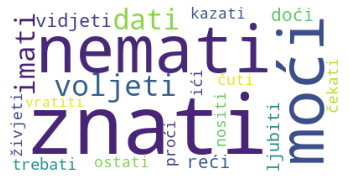

In [301]:
word_cloud = WordCloud(max_words = 20, background_color = 'white').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud)#, interpolation='bilinear')

plt.axis("off")

plt.show()


In [190]:
df_unique_lemmas["Artist_ID"] = df_unique_lemmas.Song_ID.str.split("_").map(lambda x: x[0])

In [46]:
df_unique_lemmas["Artist"] = df_unique_lemmas["Artist_ID"].map(lambda x: get_artist_name(x)[0])

KeyboardInterrupt: ignored

In [191]:
lemma = "Hrvatska"
df_unique_lemmas[df_unique_lemmas.lemma == lemma].Artist_ID.value_counts().index.map(lambda x: get_artist_name(x)[0])

Index(['Najbolji Hrvatski Tamburaši', 'Thompson', 'Prljavo Kazalište',
       'Mišo Kovač', 'Doris Dragović', 'Krunoslav Kićo Slabinac', 'Severina',
       'Colonia', 'Zabranjeno Pušenje', 'Baruni', 'Josipa Lisac',
       'Psihomodo Pop', 'Darko Rundek', 'Jasmin Stavros', 'Ivan Zak'],
      dtype='object')

In [192]:
df_unique_lemmas[df_unique_lemmas.lemma == lemma].Artist_ID.value_counts().index

Index(['CDOhygHn', 'Wm5tG4b5', 'Xp4QBL1e', 'zT3Xu5sD', 'RH/jD1hv', '4XHKfXTU',
       '538Exp8s', 'QUgrhjBj', 'TkHYG/uZ', 'MZPizswt', 'D7roOOt+', 'zdPtejCw',
       '0iPNl+uu', 'FJdcVEAU', '3xr7k3c7'],
      dtype='object')

In [193]:
df_unique_lemmas[df_unique_lemmas.lemma == lemma].Artist_ID.value_counts().values

array([11,  8,  4,  3,  2,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [183]:
df_unique_lemmas[df_unique_lemmas.lemma == lemma][["Song", "Artist_ID"]]

,Song,Artist_ID
1504,Grobovi im nikad oprostiti neće,zT3Xu5sD
1563,"Hej, vi borci",zT3Xu5sD
1667,Herceg-Bosna (To je zemlja gdje zive Hrvati),zT3Xu5sD
9987,Lupi petama,Xp4QBL1e
10293,Moj dom je Hrvatska,Xp4QBL1e
10400,Ruža Hrvatska,Xp4QBL1e
12063,Radio Dubrava,Xp4QBL1e
42363,Brazil,538Exp8s
52387,Dajem ti srce,ADDMrKZd
55811,"Sedam mora, sedam gora",ADDMrKZd


In [63]:
df_unique_lemmas[df_unique_lemmas.lemma == "Hrvatska"].Artist_ID.value_counts()

CDOhygHn    11
Wm5tG4b5     8
Xp4QBL1e     4
zT3Xu5sD     3
ADDMrKZd     2
4XHKfXTU     2
538Exp8s     1
QUgrhjBj     1
TkHYG/uZ     1
MZPizswt     1
D7roOOt+     1
zdPtejCw     1
0iPNl+uu     1
FJdcVEAU     1
3xr7k3c7     1
Name: Artist_ID, dtype: int64

In [79]:
df_unique_lemmas[(df_unique_lemmas.Artist_ID == "slj31+FY")].Song.unique()

array(['Andjele moj, moj andjele', 'Avantura (+Miro Ungar)',
       'Balada o zelenom kralju', 'Bilo je lijepo', 'Bit će bolje, znam.',
       'Bože, kako te volim', 'Ćakule o siromajima', 'Con sordino',
       'Da li su me voljeli ?', 'Da sam te prije srela',
       'Dalmacijo, sreco moja (feat. Ivo Pattiera)', 'Dalmatinko',
       'Divlja strast', 'Dok istina postoji', 'Dubrovačka zvona',
       'Forca, Maestro', 'Gdje ima srca, tu sam i ja', 'Gitara romana',
       'Izlazi sunce', 'Gledam moje Konavle', 'Govori tiše',
       "I ni me stra'", 'Ima te', 'Ja ću uvijek biti tvoja,',
       'Ja jubin te zauvik', 'Ja ne žalim dane', 'Ja sam pjesma',
       'Ja sam tvoja muzika', 'Ja ti samo pjevat mogu',
       'Jedna klupa, jedan kut', 'Jer, to je ljubav',
       'Još se srce umorilo nije', 'Jos u meni ima vatre',
       'Kad bi vratio se ti', 'Kad jednog dana prisjetim se svega',
       'Kad porasteš, sine', 'Kad sam s tobom', 'Kad se jednom vratiš ti',
       'Kada odeš', 'Katedrala (N

In [75]:
[id for id in df_unique_lemmas.Artist_ID.unique() if id not in([a[0] for a in artist_ids])]

['ADDMrKZd', '8OmGRJSa', 'slj31+FY']

In [71]:
conn = sqlite3.connect('/content/gdrive/My Drive/CroLyrics_data/info.db')
c = conn.cursor()
c.execute("SELECT * FROM artists")
artist_ids = c.fetchall()

In [80]:
len([a[0] for a in artist_ids])

52

In [109]:
religion_names = ["Bog", "Isus", "Krist", "Bogo"]
location_names = ["Hrvat", "Slavonac"]

In [111]:
names[~names.index.isin(religion_names) & ~names.index.isin(location_names)][0:20]

Marija      28
Ana         13
Duje        10
Ivana        8
Nina         8
Ivan         8
Danica       8
Tito         7
Ivo          7
Ante         6
Severina     5
Josip        5
Mate         5
Luka         5
Mare         5
Petar        5
Sanja        4
Tomislav     4
Eva          4
Miki         4
Name: lemma, dtype: int64

In [21]:
organizations

Hajduk      12
Dinamo       4
Croatia      3
CIA          3
Colonia      3
            ..
Alhos        1
Koševo       1
KK           1
Sai-Baba     1
Fender       1
Name: lemma, Length: 100, dtype: int64

In [12]:
grams_text=[]
grams_lemma = []

for i in df_unique_lemmas[df_unique_lemmas.upos=="ADJ"]["index"]:
    if df.loc[i+1].upos == "NOUN":
      grams_text.append([df_unique_lemmas[df_unique_lemmas["index"] == i].text.values[0], df.loc[i+1].text])
      grams_lemma.append([df_unique_lemmas[df_unique_lemmas["index"] == i].lemma.values[0], df.loc[i+1].lemma])

In [13]:
pd.Series(grams_lemma).astype(str).value_counts()[0:50]

['cijel', 'život']     55
['nov', 'dan']         48
['cijel', 'svijet']    48
['cijel', 'noć']       47
['drugi', 'strana']    33
['dobar', 'dan']       28
['prav', 'ljubav']     25
['crn', 'oko']         25
['cijel', 'dan']       25
['prvi', 'ljubav']     24
['lak', 'noć']         24
['plav', 'more']       22
['drugi', 'žena']      21
['dobar', 'jutro']     20
['sav', 'strana']      20
['star', 'ljubav']     18
['dug', 'noć']         17
['nov', 'jutro']       17
['čitav', 'život']     17
['rodan', 'kraj']      17
['lijep', 'žena']      16
['dobar', 'čovjek']    16
['drugi', 'čovjek']    16
['star', 'rana']       15
['hladan', 'noć']      14
['sav', 'noć']         13
['crn', 'vino']        13
['star', 'slika']      13
['čitav', 'svijet']    13
['prvi', 'dan']        13
['nov', 'ljubav']      13
['zadnji', 'dan']      13
['sav', 'vrijeme']     12
['lijep', 'dan']       12
['sunčan', 'dan']      12
['isti', 'tren']       12
['grub', 'rič']        12
['mali', 'stvar']      12
['loš', 'dan

In [14]:
grams_text=[]
grams_lemma = []

for i in df_unique_lemmas[df_unique_lemmas.upos=="NOUN"]["index"]:
    if df.loc[i+1].upos == "ADJ":
      grams_text.append([df_unique_lemmas[df_unique_lemmas["index"] == i].text.values[0], df.loc[i+1].text])
      grams_lemma.append([df_unique_lemmas[df_unique_lemmas["index"] == i].lemma.values[0], df.loc[i+1].lemma])

In [15]:
pd.Series(grams_lemma).astype(str).value_counts()[0:50]

['pjesma', 'star']        18
['srce', 'sav']           17
['dan', 'sav']            16
['ljubav', 'sav']         11
['sreća', 'sav']          11
['život', 'cijel']        11
['ljubav', 'star']        10
['život', 'sav']          10
['ljubav', 'jedini']      10
['zvijezda', 'sjajan']    10
['čovjek', 'sav']          9
['prijatelj', 'sav']       9
['vrijeme', 'sav']         9
['srce', 'drag']           9
['stvar', 'sav']           8
['ljubav', 'velik']        7
['nebo', 'plav']           7
['pjesma', 'ljubavni']     7
['riječ', 'sav']           7
['oko', 'crn']             7
['kosa', 'plav']           7
['srce', 'slomiti']        7
['oko', 'plav']            7
['godina', 'dug']          7
['prijatelj', 'star']      7
['noć', 'pun']             7
['slika', 'star']          7
['duša', 'pun']            7
['svijet', 'sav']          6
['ljubav', 'prav']         6
['noć', 'dug']             6
['oko', 'pun']             6
['glava', 'lud']           6
['ljubav', 'nov']          6
['društvo', 's